# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [73]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 137MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation/

## Import Libraries

In [74]:
import tensorflow as tf

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    batch_size=64,
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='training',
    image_size=(64, 64))

Found 1382 files belonging to 2 classes.
Using 1175 files for training.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/ParkingLot_Occupation/train',
    batch_size=64,
    seed=123,
    validation_split=0.15,
    subset='validation',
    image_size=(64, 64))

Found 1382 files belonging to 2 classes.
Using 207 files for validation.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/ParkingLot_Occupation/test',
    batch_size=64,
    seed=123,
    image_size=(64, 64))

Found 344 files belonging to 2 classes.


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [ ]:
# we already split the data above

**Images preproccessing layers**

In [ ]:
resize_rescale = Sequential([
    tf.keras.layers.Resizing(64,64),
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")
])

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [ ]:
model = Sequential()
model.add(resize_rescale)
model.add(data_augmentation)

model.add(Conv2D(10, (2,2), activation='relu', padding='same'))
model.add(Conv2D(20, (2,2), activation='relu', padding='same'))
model.add(Conv2D(20, (2,2), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(15, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 10)          │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 20)          │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 20)          │           1,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 81920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │       1,228,815 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,695,180 (14.10 MB)

 Trainable params: 1,231,726 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,463,454 (9.40 MB)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [ ]:
hist = model.fit(train_data, epochs=20, batch_size=64, validation_data = val_data)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.5108 - loss: 0.6937 - val_accuracy: 0.8792 - val_loss: 0.4516
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 373ms/step - accuracy: 0.8596 - loss: 0.4060 - val_accuracy: 0.9420 - val_loss: 0.2101
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step - accuracy: 0.9269 - loss: 0.2124 - val_accuracy: 0.9565 - val_loss: 0.1252
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.9318 - loss: 0.1635 - val_accuracy: 0.9662 - val_loss: 0.1083
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.9546 - loss: 0.1174 - val_accuracy: 0.9807 - val_loss: 0.1085
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step - accuracy: 0.9728 - loss: 0.0923 - val_accuracy: 0.9758 - val_loss: 0.1188
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.9702 - loss: 0.0953 - val_accuracy: 0.9710 - val_loss: 0.1157
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 371ms/step - accuracy: 0.9849 - loss: 0.0592 - val_accuracy

## Evaluate the Model
Evaluate the performance of the model on the test set.

training set

In [ ]:
model.evaluate(train_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9742 - loss: 0.0814 


[0.07164191454648972, 0.9744681119918823]

validation set

In [ ]:
model.evaluate(val_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9830 - loss: 0.0635


[0.07806126773357391, 0.9758453965187073]

test set

In [ ]:
model.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9763 - loss: 0.0566


[0.05713171884417534, 0.979651153087616]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

In [82]:
import keras

In [84]:
loaded_model = keras.saving.load_model("/content/drive/MyDrive/Week4 task/CNN.keras")

In [87]:
img_path = keras.utils.load_img(
    '/content/ParkingLot_Occupation/test/occupied/roi_004bfe83116849df90430e501a2c8fd0_occupied.jpg',
    color_mode="rgb",
    target_size=(64,64),
)

In [90]:
input_arr = keras.utils.img_to_array(img_path)
input_arr = np.array([input_arr])
predictions = loaded_model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [99]:
if predictions[0][0] == 0.0:
  pred = 'empty'
elif predictions[0][0] == 1.0:
  pred = 'occupied'

predicted image:  occupied


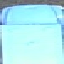

In [100]:
print('predicted image: ', pred)
img_path

In [ ]:
y_hat = model.predict(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [ ]:
y_hat

array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.51104899e-02],
       [6.00256084e-04],
       [6.38144016e-02],
       [4.32761200e-02],
       [1.00000000e+00],
       [2.05419566e-02],
       [1.00000000e+00],
       [1.06433267e-02],
       [9.99999106e-01],
       [1.47217587e-02],
       [7.27135763e-02],
       [5.86993843e-02],
       [5.92650846e-02],
       [1.99032743e-02],
       [2.00004713e-03],
       [9.65015292e-01],
       [2.51430795e-02],
       [1.46934763e-02],
       [4.05069962e-02],
       [2.38905754e-03],
       [2.57282313e-02],
       [9.71828938e-01],
       [4.01318655e-04],
       [9.12358463e-01],
       [1.00000000e+00],
       [7.68020332e-01],
       [1.00000000e+00],
       [1.71003062e-02],
       [1.00000000e+00],
       [9.99999464e-01],
       [9.99999583e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.79245342e-03],
       [9.99999821e-01],
       [4.06597368e-02],


In [ ]:
import numpy as np
y_hat_arg = np.argmax(y_hat, axis=1)

In [ ]:
y_hat_arg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

In [ ]:
import matplotlib.pyplot as plt

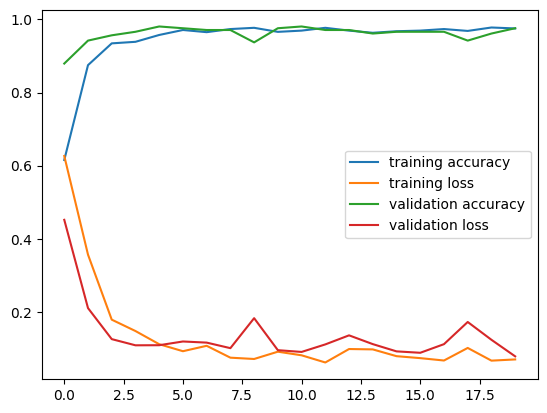

In [ ]:
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('/content/drive/MyDrive/Week4 task/CNN.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

###i choosed to first resize to 64*64 images and rescaling for the model to perfome better,
###for augmentation i used as above layers in the augmentation layers because when i was devolepin a cnn models befi=ore i found this as a good augmentation layers,
###my model consist of 3 conv layers and 3 dense layers whech gave me amazing accuracy, relu for hidden layers and sigmoid for output layers for binary classification, model trained with 64 batch size and 20 epochs and adam optimizer which the nodel converge amazingly, binary crossentroby loss is what is suited for binary classification, there's no need for Regularization Techniques the model performe well without them, Model Evaluation on training, validation, testing set to find if there's an overfitting or underfitting and there's not anything, Model Visualization shows the model converges, there's no Overfitting or Underfitting
